# Multi armed bandit

## Enunciado

El presente ejercicio es similar al caso práctico de repaso de optimización de campañas de marketing online ya realizado y lo que se pretende con este es asentar los conceptos relativos al algoritmo del bandido multibrazo, como son las ratios de explotación y exploración para la optimización de una campaña de marketing online.

Al igual que en el caso práctico de repaso, se tiene que hacer una campaña de marketing online para promocionar un determinado producto con la que se mostrará en una página web un banner con una imagen del producto que promocionar. Se han realizado cinco imágenes distintas del producto para poner en el banner con el objetivo de captar la atención del usuario para que pulse en el banner y acceda a la web con los detalles del producto que promocionar, pero, **a diferencia del caso práctico de repaso, los resultados obtenidos serán diferentes, siendo otra imagen la que mayor valor de Q** tenga calculado a partir de la siguiente fórmula:

$$Q(imagen_i) = \frac{Nº Clicks}{Nº impresiones de la pagina}$$

Sin saber a priori cuál es la imagen que captará mayor atención, se debe aprender con base en los clics que se realizan sobre el banner qué imagen será las más llamativa y conseguirá más visitas aplicando el método del bandido multibrazo.

El objetivo es encontrar la imagen que capte mayor atención de los usuarios, es decir que mayor número de clics obtenga:

Dado el método ya implementado en el notebook “multi_armed_bandit(num_games=1000, epsilon=0.1, verbose=False)”, se pide, modificando el valor de épsilon, responder a la siguientes preguntas para asentar los conceptos relativos al aprendizaje por refuerzo y, en particular, al algoritmo del bandido multibrazo:



1. ¿Cuáles el valor de épsilon que maximiza la imagen con mayor número de clics?
2. ¿Cuáles la imagen que más clics obtiene y cuántos?
3. Poniendo una ratio de explotación del 100%, ¿Qué resultado se obtiene?


Todas estas preguntas deben de ser contestadas en el propio notebook.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def multi_armed_bandit(num_games=1000, epsilon=0.1, verbose=False):
    
    bandits = [0.1, 0.75, 0.03, 0.2, 0.02]
    total_reward = 0
    acum_reward_bandit = np.zeros(len(bandits))  # numerador
    num_selected_bandit = np.zeros(len(bandits)) # denominador
    q_bandits = np.zeros(len(bandits))            # Q(a)
    
    if verbose:
        print("Initial Bandits Distribution\n  {}".format(bandits))
    
    for game in range(0,num_games):
        
        old_q_bandits = q_bandits.copy()
        
        if np.random.random() < epsilon:
            bandit = np.random.randint(len(bandits)) # Exploro
        else:
            bandit = np.random.choice(np.flatnonzero(q_bandits == q_bandits.max())) # Exploto 
            
        # Obtengo el reward
        reward = 1 if (np.random.random() < bandits[bandit]) else 0
        
        # Actualizo reward total
        total_reward += reward
        
        # Actualizo valor (Q) de la imagen
        acum_reward_bandit[bandit] += reward
        num_selected_bandit[bandit] += 1
        q_bandits[bandit] = acum_reward_bandit[bandit] / num_selected_bandit[bandit]
        
        if verbose:
            print("\nGAME {game}\n  Old Q_Bandits = {old_q_bandits}\n  Selected Bandit = {bandit} \
                  \n  Reward = {reward}\n  Q_Bandits = {q_bandits}"
                  .format(game=game+1, old_q_bandits=old_q_bandits, bandit=bandit, 
                          reward=reward, q_bandits=q_bandits))
    
    return bandits, total_reward, q_bandits, num_selected_bandit

def solver (EPSILON):
    np.set_printoptions(precision=4)

    bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit(num_games=1000, 
                                                                               epsilon=EPSILON, 
                                                                               verbose=False)

    print("Initial Bandits Distribution\n  {}".format(bandits))
    print("Bandits Distribution games\n  {}".format(num_selected_bandit))
    print("Q(a) Bandits\n  {}".format(q_bandits))
    print("CLICKS: {}".format(total_reward))

    # Mostramos en una gráfica de barras el número de veces que elegimos cada "tragaperras"
    plt.title('Epsilon-greedy = {}'.format(EPSILON))
    plt.bar(range(1,len(bandits)+1), num_selected_bandit)
    plt.xlabel('Bandido')
    plt.ylabel('num veces elegido')
    plt.show()

### Ratio de Exploración EPSILON:

NOTA: se toma la segunda imagen como la que mayor Q(a) se supone que tendrá. 

### 1. ¿Cuál es el valor de épsilon que maximiza la imagen con mayor número de clicks?
    + RESPUESTA: El valor debería de ser entorno a 0.1 [0.06-0.15] serian valores válidos
        
### 2. ¿Cuáles la imagen que más clics obtiene y cuántos?
    + RESPUESTA: Es la imagen 2 con un número de Clicks que debe rondar entre los 600 y 700.

Initial Bandits Distribution
  [0.1, 0.75, 0.03, 0.2, 0.02]
Bandits Distribution games
  [ 21. 909.  32.  18.  20.]
Q(a) Bandits
  [0.0476 0.7613 0.0625 0.2222 0.1   ]
CLICKS: 701


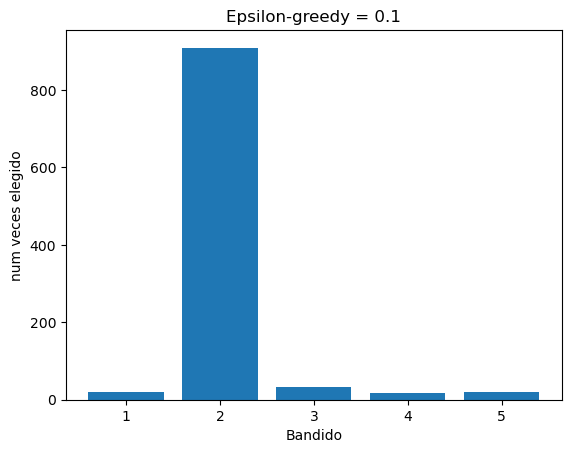

In [3]:
solver(0.1)

Initial Bandits Distribution
  [0.1, 0.75, 0.03, 0.2, 0.02]
Bandits Distribution games
  [ 18. 942.  11.  16.  13.]
Q(a) Bandits
  [0.2778 0.7325 0.     0.3125 0.    ]
CLICKS: 700


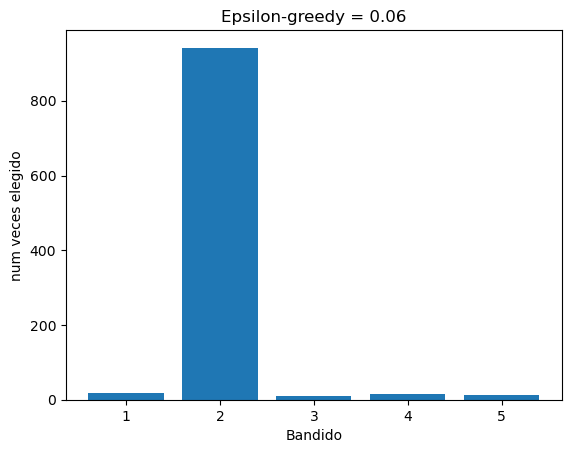

In [4]:
solver(0.06)

Initial Bandits Distribution
  [0.1, 0.75, 0.03, 0.2, 0.02]
Bandits Distribution games
  [ 50. 853.  27.  33.  37.]
Q(a) Bandits
  [0.1    0.7737 0.037  0.2424 0.    ]
CLICKS: 674


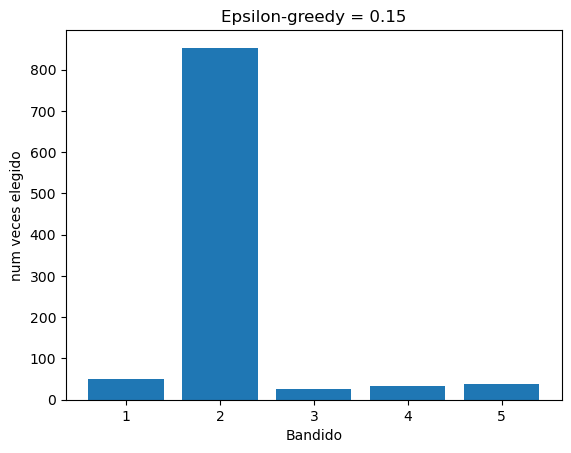

In [5]:
solver(0.15)

### 3. Poniendo una ratio de explotación del 100%, ¿Qué resultado se obtiene?
    + RESPUESTA: Con este ratio de exploración obtenemos muy malos resultados ya que estamos seleccionando una imagen de manera aleatoria.

Initial Bandits Distribution
  [0.1, 0.75, 0.03, 0.2, 0.02]
Bandits Distribution games
  [207. 213. 190. 188. 202.]
Q(a) Bandits
  [0.1111 0.784  0.0263 0.1915 0.0297]
CLICKS: 237


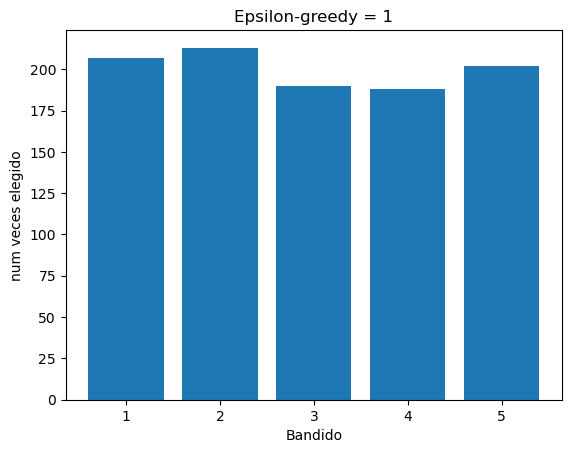

In [6]:
solver(1)